In [1]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine
from vnpy.app.cta_strategy.strategies.turtle_signal_strategy import (
    TurtleSignalStrategy,
)
from datetime import datetime

In [2]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="IF99.CFFEX",
    interval="1m",
    start=datetime(2013, 1, 1),
    end=datetime(2019, 3, 30),
    rate=0,
    slippage=0,
    size=300,
    pricetick=0.2,
    capital=1_000_000,
)

2019-01-30 12:25:59.002493	开始加载历史数据
2019-01-30 12:26:34.081621	历史数据加载完成，数据量：376572
2019-01-30 12:26:34.332922	策略初始化完成
2019-01-30 12:26:34.333896	开始回放历史数据
2019-01-30 12:27:21.518437	历史数据回放结束
2019-01-30 12:27:21.518437	开始计算逐日盯市盈亏
2019-01-30 12:27:21.898312	逐日盯市盈亏计算完成
2019-01-30 12:27:21.898312	开始计算策略统计指标
2019-01-30 12:27:21.929482	------------------------------
2019-01-30 12:27:21.929482	首个交易日：	2013-02-01
2019-01-30 12:27:21.929482	最后交易日：	2019-01-30
2019-01-30 12:27:21.929482	总交易日：	1459
2019-01-30 12:27:21.929482	盈利交易日：	805
2019-01-30 12:27:21.929482	亏损交易日：	654
2019-01-30 12:27:21.929482	起始资金：	1,000,000.00
2019-01-30 12:27:21.929482	结束资金：	220,899,784.04
2019-01-30 12:27:21.929482	总收益率：	21,989.98%
2019-01-30 12:27:21.929482	年化收益：	3,617.27%
2019-01-30 12:27:21.929482	最大回撤: 	-57,892,062.00%
2019-01-30 12:27:21.929482	百分比最大回撤: -1,199.55%
2019-01-30 12:27:21.929482	总盈亏：	219,899,784.04%
2019-01-30 12:27:21.929482	总手续费：	0.00
2019-01-30 12:27:21.929482	总滑点：	0.00
2019-01-30 12:27:21.929482	总成交金额：

C:\Github\vnpy\vnpy\app\cta_strategy\backtesting.py:306: RuntimeWarning: invalid value encountered in log
  df["return"] = (np.log(df["balance"] - np.log(df["balance"].shift(1)))).fillna(


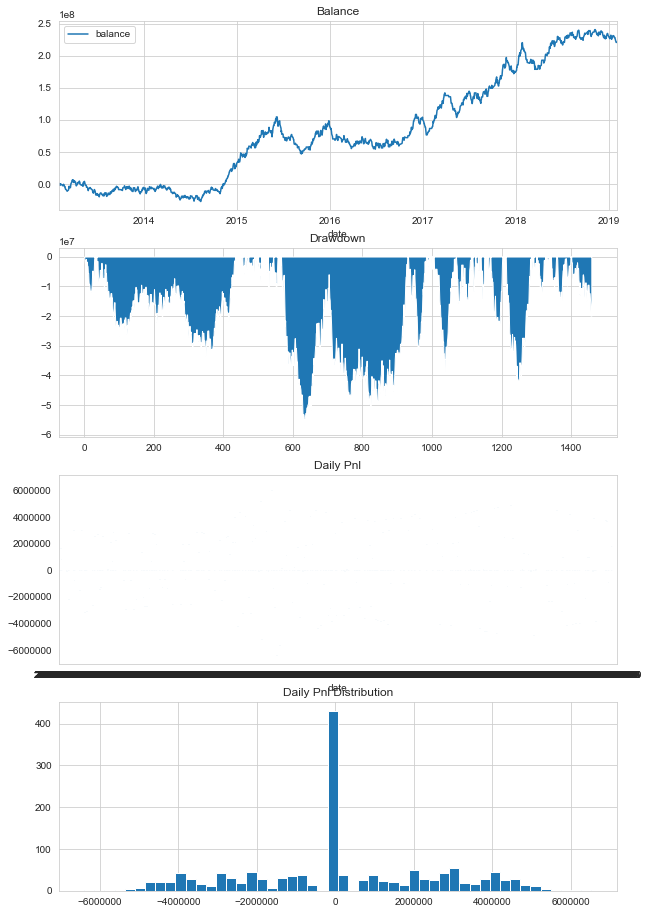

In [3]:
#%%
engine.add_strategy(TurtleSignalStrategy, {})
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()